# **Preliminary Data Analysis**

#Imports :

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import coverage_error

In [4]:
data = pd.read_pickle('/content/ass2.pickle')

train_data = data['train']
dev_data = data['dev']
test_data = data['test']

train_df = pd.DataFrame(train_data)
dev_df = pd.DataFrame(dev_data)
test_df = pd.DataFrame(test_data)

# for train
print(train_df.head())
print(train_df.describe())
print(train_df.info())

# for dev
print(dev_df.head())
print(dev_df.describe())
print(dev_df.info())

# for test
print(test_df.head())
print(test_df.describe())
print(test_df.info())

# Plotting function
def plot_it_better(df):
    sns.pairplot(df, hue='target')
    plt.show()

# Visualize train data
#plot_it_better(train_df)


       f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  ...  f33  f34  f35  f36  f37  \
51905   1   0   0   0   0   0   2   1   2   2  ...    0    0    0    2    0   
52612   0   0   0   0   0   0   2   1   0   0  ...    0    0    0    2    0   
61699   2   1   2   1   1   0   2   2   0   0  ...    0    0    0    1    0   
6291    0   0   0   0   0   0   0   0   0   0  ...    0    0    0    2    0   
17484   0   0   0   0   0   0   1   1   2   0  ...    0    0    0    2    1   

       f38  f39  f40  f41  target  
51905    0    0    0    0       2  
52612    0    0    0    0       2  
61699    0    0    0    0       2  
6291     0    0    0    0       2  
17484    2    0    0    0       2  

[5 rows x 43 columns]
                 f0            f1            f2            f3            f4  \
count  40533.000000  40533.000000  40533.000000  40533.000000  40533.000000   
mean       0.959539      0.540054      0.270890      0.131745      0.051982   
std        0.834109      0.779471      0.612657  

In [5]:
X_train = train_df.drop('target', axis=1)  # Replace 'target_column' with actual target column name
y_train = train_df['target']

X_dev = dev_df.drop('target', axis=1)
y_dev = dev_df['target']

X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# The different models we tried


*   KNeighbors
*   Decision Tree
*   Random Forest
*   Logistical Regression
*   AdaBoost
*   Gradient Boosting
*   SVC
*   GaussianNB






# Evaluation function for the models.

the evaluation matrices we chose:

*   accuracy score
*   confusion matrixes



In [6]:

def evaluate_classifier(clf, X_train, y_train, X_dev, y_dev):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_dev)
    acc = accuracy_score(y_dev, y_pred)
    cm = confusion_matrix(y_dev, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    print(f'{clf.__class__.__name__} Accuracy: {acc}')



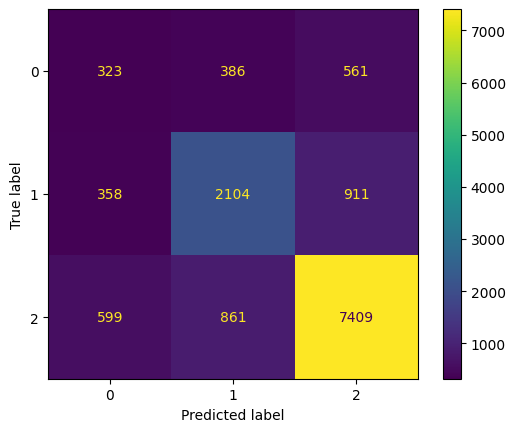

DecisionTreeClassifier Accuracy: 0.7279455298993487


In [7]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
tree_acc = evaluate_classifier(decision_tree, X_train, y_train, X_dev, y_dev)


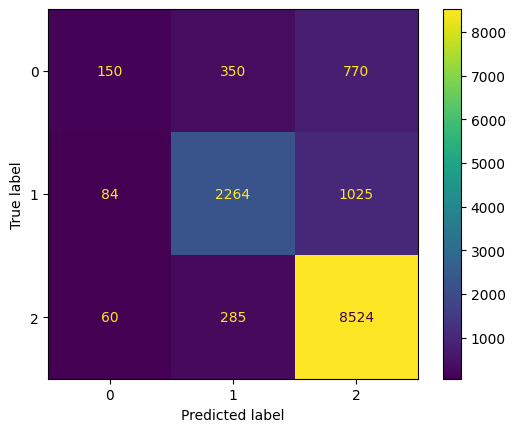

RandomForestClassifier Accuracy: 0.8095026642984015


In [8]:
# Random Forest
random_forest = RandomForestClassifier()
forest_acc = evaluate_classifier(random_forest, X_train, y_train, X_dev, y_dev)


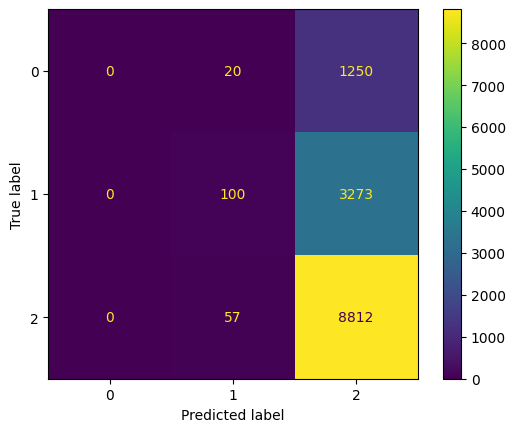

LogisticRegression Accuracy: 0.6595618709295441


In [9]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg_acc = evaluate_classifier(log_reg, X_train, y_train, X_dev, y_dev)


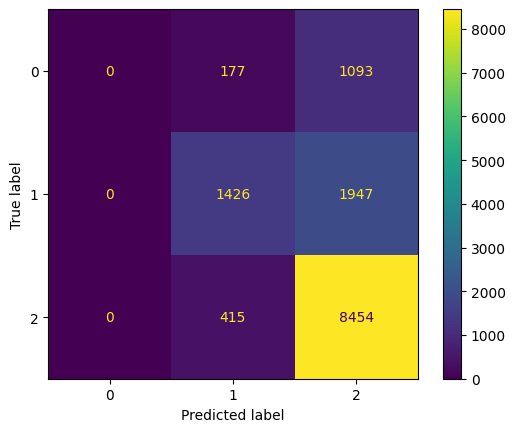

AdaBoostClassifier Accuracy: 0.7312018946121965


In [10]:
# AdaBoost
ada = AdaBoostClassifier()
ada_acc = evaluate_classifier(ada, X_train, y_train, X_dev, y_dev)


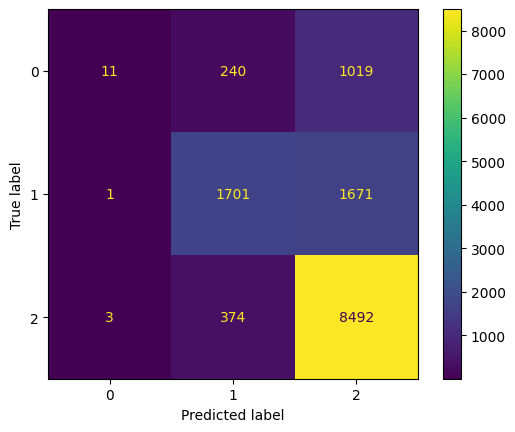

GradientBoostingClassifier Accuracy: 0.7551805802249852


In [11]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc_acc = evaluate_classifier(gbc, X_train, y_train, X_dev, y_dev)


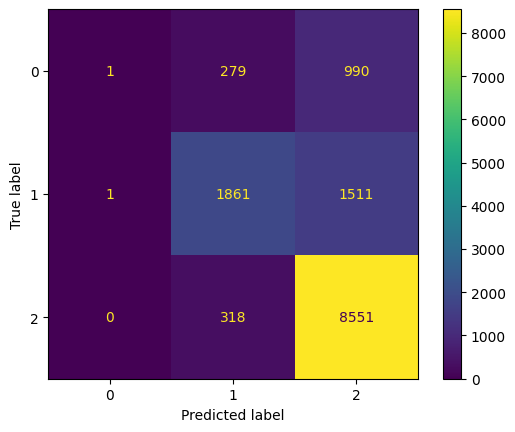

SVC Accuracy: 0.7706483126110124


In [12]:
# SVC
svc = SVC(probability=True)
svc_acc = evaluate_classifier(svc, X_train, y_train, X_dev, y_dev)


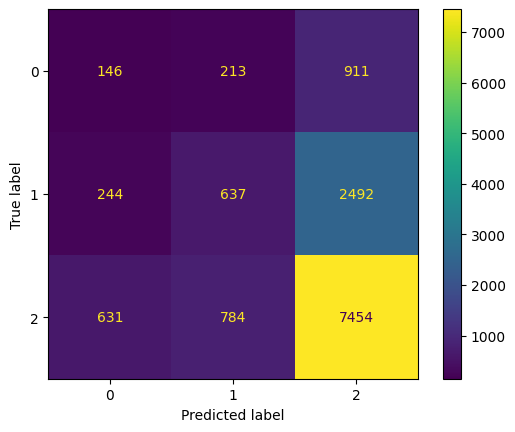

GaussianNB Accuracy: 0.6096062759029012


In [13]:
# GaussianNB
gnb = GaussianNB()
gnb_acc = evaluate_classifier(gnb, X_train, y_train, X_dev, y_dev)

We have run all of our models with basic setup.


As of now it seems that **Random Forest** has achieved the greatest accuracy.
In the following part, we will run some preprocessing function to enhances the performance of the models, leading to more reliable and robust outcomes.


# preprocessing

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# fist we will balance the data set just like we did in the first assignment
def balance_dataset(df):
    min_count = df['target'].value_counts().min()
    balanced_df = pd.DataFrame()

    for label in df['target'].unique():
        label_df = df[df['target'] == label]
        sampled_df = label_df.sample(min_count)
        balanced_df = pd.concat([balanced_df, sampled_df])

    return balanced_df

balanced_train_df = balance_dataset(train_df)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train_scaled)
X_dev = pca.transform(X_dev_scaled)
X_test = pca.transform(X_test_scaled)


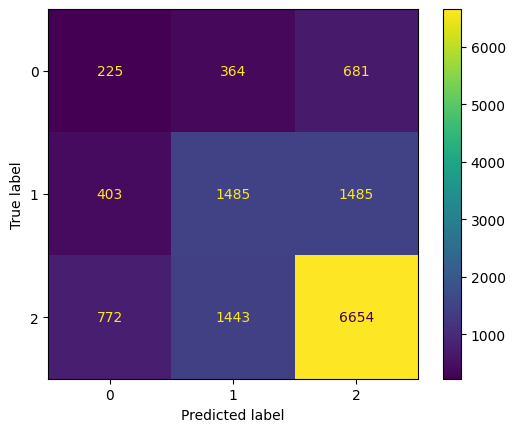

DecisionTreeClassifier Accuracy: 0.6190053285968028


In [15]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
tree_acc = evaluate_classifier(decision_tree, X_train, y_train, X_dev, y_dev)


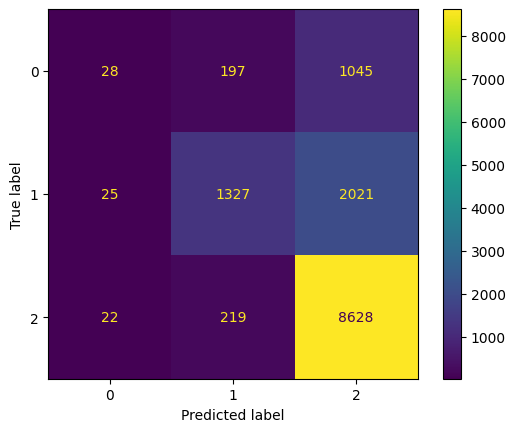

RandomForestClassifier Accuracy: 0.7388247483718177


In [16]:
# Random Forest
random_forest = RandomForestClassifier()
forest_acc = evaluate_classifier(random_forest, X_train, y_train, X_dev, y_dev)


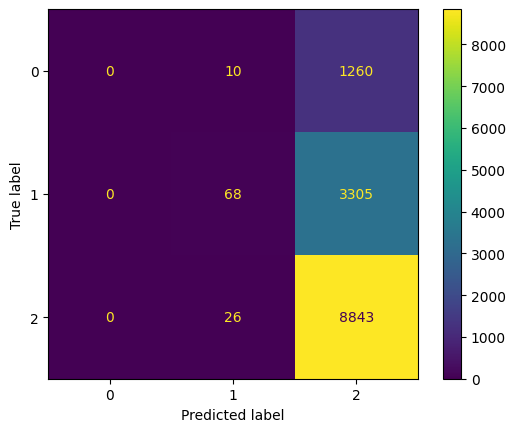

LogisticRegression Accuracy: 0.6594878626406158


In [17]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg_acc = evaluate_classifier(log_reg, X_train, y_train, X_dev, y_dev)


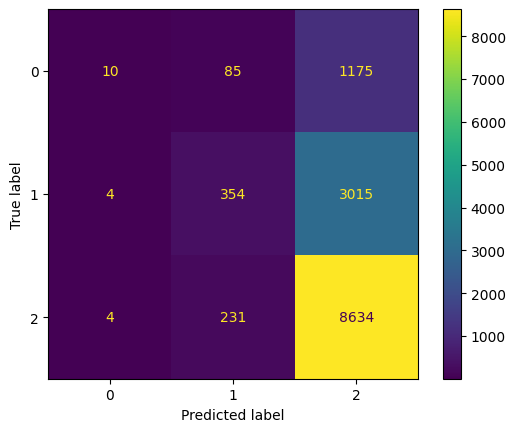

AdaBoostClassifier Accuracy: 0.6659265837773831


In [18]:
# AdaBoost
ada = AdaBoostClassifier()
ada_acc = evaluate_classifier(ada, X_train, y_train, X_dev, y_dev)

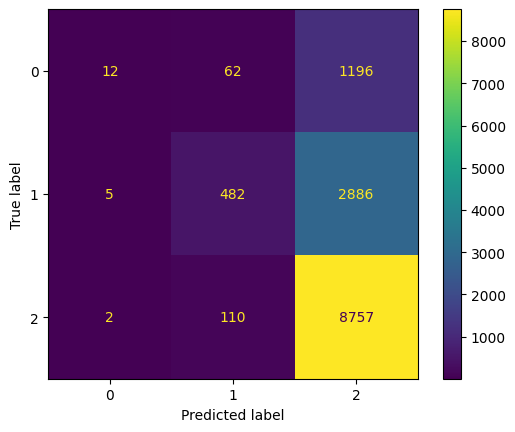

GradientBoostingClassifier Accuracy: 0.6846506808762581


In [19]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc_acc = evaluate_classifier(gbc, X_train, y_train, X_dev, y_dev)

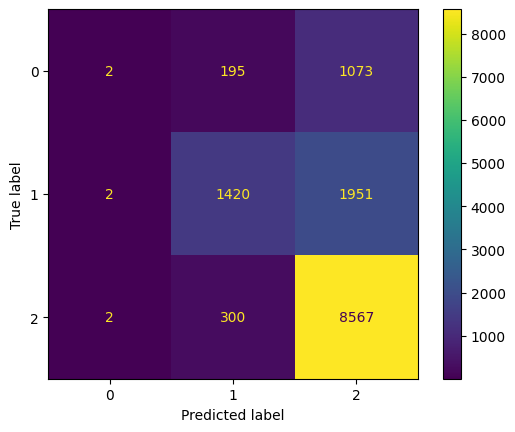

SVC Accuracy: 0.7392687981053878


In [20]:
# SVC
svc = SVC(probability=True)  # Set probability=True to use predict_proba for coverage_error
svc_acc = evaluate_classifier(svc, X_train, y_train, X_dev, y_dev)

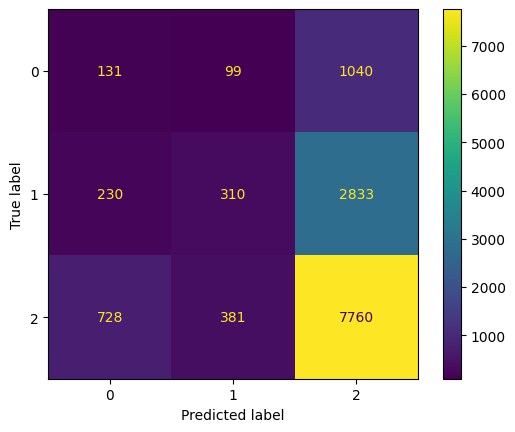

GaussianNB Accuracy: 0.6069419775014802


In [21]:
# GaussianNB
gnb = GaussianNB()
gnb_acc = evaluate_classifier(gnb, X_train, y_train, X_dev, y_dev)

# Hyper-Parameters

In the following part, we will use GridSearchCv in order to find the best hyper-parameters and run all of the models again to view the best case results.

In [22]:
from sklearn.model_selection import GridSearchCV

# K-Nearest Neighbors

n_neighbors: Number of neighbors to consider.

weights: How to weight the neighbors' votes.

metric: How to measure distance between points.

In [23]:
# KNeighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_param_grid, cv=3, n_jobs=-1, verbose=2)
knn_grid_search.fit(X_train, y_train)

best_knn = knn_grid_search.best_estimator_
print(f'Best KNeighbors Hyperparameters: {knn_grid_search.best_params_}')
y_pred_best_knn = best_knn.predict(X_dev)
best_knn_acc = accuracy_score(y_dev, y_pred_best_knn)
print(f'Best KNeighbors Accuracy after tuning: {best_knn_acc}')
print(classification_report(y_dev, y_pred_best_knn))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best KNeighbors Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNeighbors Accuracy after tuning: 0.7519982238010657
              precision    recall  f1-score   support

           0       0.38      0.09      0.14      1270
           1       0.71      0.49      0.58      3373
           2       0.77      0.95      0.85      8869

    accuracy                           0.75     13512
   macro avg       0.62      0.51      0.52     13512
weighted avg       0.72      0.75      0.72     13512



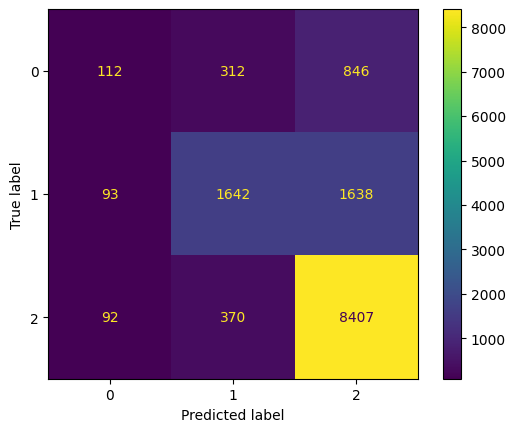

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_dev, y_pred_best_knn))
disp.plot()
plt.show()

# Decision Tree

max_depth: Maximum depth of each tree.

min_samples_split: Minimum samples needed to split a node.

min_samples_leaf: Minimum samples needed at a leaf node.

In [24]:

# Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_param_grid, cv=3, n_jobs=-1, verbose=2)
dt_grid_search.fit(X_train, y_train)

best_dt = dt_grid_search.best_estimator_
print(f'Best Decision Tree Hyperparameters: {dt_grid_search.best_params_}')
y_pred_best_dt = best_dt.predict(X_dev)
best_dt_acc = accuracy_score(y_dev, y_pred_best_dt)
print(f'Best Decision Tree Accuracy after tuning: {best_dt_acc}')
print(classification_report(y_dev, y_pred_best_dt))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Decision Tree Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Accuracy after tuning: 0.6697750148016578
              precision    recall  f1-score   support

           0       0.17      0.02      0.04      1270
           1       0.51      0.28      0.36      3373
           2       0.70      0.91      0.79      8869

    accuracy                           0.67     13512
   macro avg       0.46      0.40      0.40     13512
weighted avg       0.60      0.67      0.61     13512



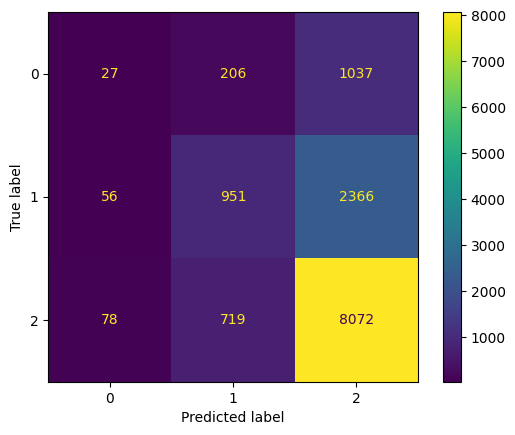

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_dev, y_pred_best_dt))
disp.plot()
plt.show()

# Random Forest

n_estimators: Number of trees in the forest.

max_depth: Maximum depth of each tree.

min_samples_split: Minimum samples needed to split a node.

min_samples_leaf: Minimum samples needed at a leaf node.

bootstrap: Whether to use bootstrap samples.

In [25]:

# RandomForest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

best_rf = rf_grid_search.best_estimator_
print(f'Best RandomForest Hyperparameters: {rf_grid_search.best_params_}')
y_pred_best_rf = best_rf.predict(X_dev)
best_rf_acc = accuracy_score(y_dev, y_pred_best_rf)
print(f'Best RandomForest Accuracy after tuning: {best_rf_acc}')
print(classification_report(y_dev, y_pred_best_rf))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best RandomForest Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RandomForest Accuracy after tuning: 0.753700414446418
              precision    recall  f1-score   support

           0       0.37      0.04      0.07      1270
           1       0.76      0.46      0.57      3373
           2       0.76      0.97      0.85      8869

    accuracy                           0.75     13512
   macro avg       0.63      0.49      0.50     13512
weighted avg       0.72      0.75      0.71     13512



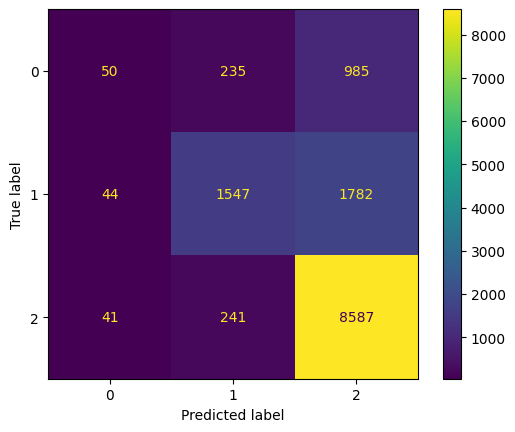

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_dev, y_pred_best_rf))
disp.plot()
plt.show()

# Logistic Regression

C: Controls regularization strength.

solver: Algorithm for optimization.

In [29]:
# Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
log_reg_grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=log_reg_param_grid, cv=3, n_jobs=-1, verbose=2)
log_reg_grid_search.fit(X_train, y_train)

best_log_reg = log_reg_grid_search.best_estimator_
print(f'Best Logistic Regression Hyperparameters: {log_reg_grid_search.best_params_}')
y_pred_best_log_reg = best_log_reg.predict(X_dev)
best_log_reg_acc = accuracy_score(y_dev, y_pred_best_log_reg)
print(f'Best Logistic Regression Accuracy after tuning: {best_log_reg_acc}')
print(classification_report(y_dev, y_pred_best_log_reg, zero_division=0))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Logistic Regression Hyperparameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Logistic Regression Accuracy after tuning: 0.6594878626406158
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1270
           1       0.65      0.02      0.04      3373
           2       0.66      1.00      0.79      8869

    accuracy                           0.66     13512
   macro avg       0.44      0.34      0.28     13512
weighted avg       0.60      0.66      0.53     13512



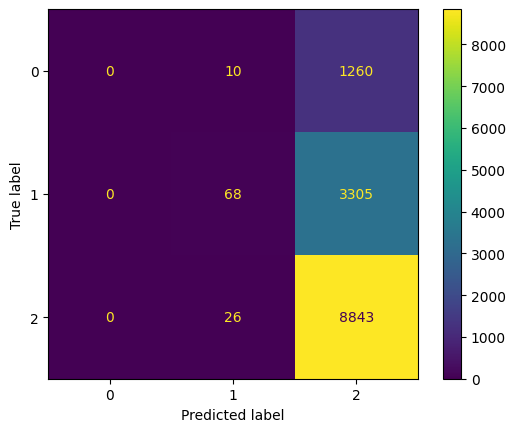

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_dev, y_pred_best_log_reg))
disp.plot()
plt.show()

# AdaBoost

n_estimators: Number of boosting stages.

learning_rate: Weight of each stage.

In [28]:
# AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
ada_grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=ada_param_grid, cv=3, n_jobs=-1, verbose=2)
ada_grid_search.fit(X_train, y_train)

best_ada = ada_grid_search.best_estimator_
print(f'Best AdaBoost Hyperparameters: {ada_grid_search.best_params_}')
y_pred_best_ada = best_ada.predict(X_dev)
best_ada_acc = accuracy_score(y_dev, y_pred_best_ada)
print(f'Best AdaBoost Accuracy after tuning: {best_ada_acc}')
print(classification_report(y_dev, y_pred_best_ada))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best AdaBoost Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best AdaBoost Accuracy after tuning: 0.6761397276494967
              precision    recall  f1-score   support

           0       0.57      0.01      0.02      1270
           1       0.56      0.18      0.28      3373
           2       0.69      0.96      0.80      8869

    accuracy                           0.68     13512
   macro avg       0.61      0.38      0.37     13512
weighted avg       0.64      0.68      0.60     13512



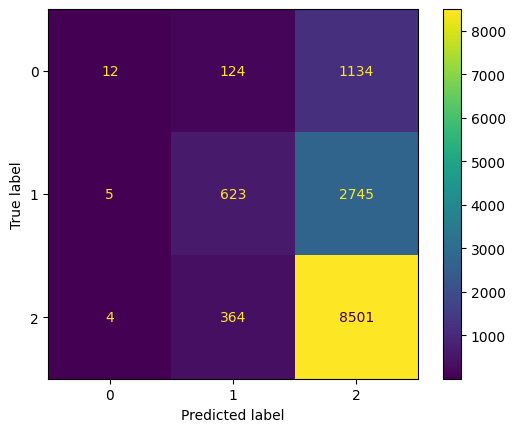

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_dev, y_pred_best_ada))
disp.plot()
plt.show()

# Gradient Boosting Classifier

learning_rate: Weight of each tree.

max_depth: Maximum depth of each tree.

n_estimators: Number of boosting stages.

In [33]:
# Gradient Boosting Classifier
gbc_param_grid = {
    'learning_rate': [0.1 ,0.5],
    'max_depth': [5, 7],
    'n_estimators': [100, 200]
}
gbc_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=gbc_param_grid, cv=2, n_jobs=-1, verbose=2)
gbc_grid_search.fit(X_train, y_train)

best_gbc = gbc_grid_search.best_estimator_
print(f'Best Gradient Boosting Hyperparameters: {gbc_grid_search.best_params_}')
y_pred_best_gbc = best_gbc.predict(X_dev)
best_gbc_acc = accuracy_score(y_dev, y_pred_best_gbc)
print(f'Best Gradient Boosting Accuracy after tuning: {best_gbc_acc}')
print(classification_report(y_dev, y_pred_best_gbc))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Gradient Boosting Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best Gradient Boosting Accuracy after tuning: 0.7649496743635287
              precision    recall  f1-score   support

           0       0.41      0.05      0.09      1270
           1       0.73      0.54      0.62      3373
           2       0.78      0.95      0.86      8869

    accuracy                           0.76     13512
   macro avg       0.64      0.51      0.52     13512
weighted avg       0.73      0.76      0.73     13512



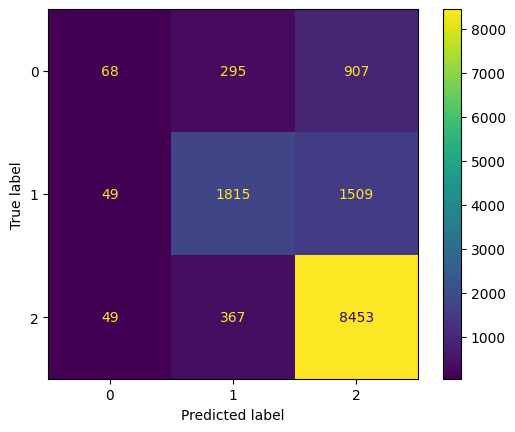

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_dev, y_pred_best_gbc))
disp.plot()
plt.show()

In the testing phase, we have also ran svc with grid search cv on different notebooks and computers in order to save time, due to long computation time.


Unfortunately, we have refreshed this notebook, and as such do not have its results.

we observed it did not have a better accuracy over our other methods, and have decided not to include its computation in this notebook, but to write about our trials here.

# results:
We conducted a hyperparameter tuning process for all the models. After evaluating various combinations of parameters, the best model results were obtained with the following hyperparameters:

**Gradient Boosting Classifier**

*   learning_rate=0.1
*   max_depth=5
*   n_estimators=200

These settings provided the optimal balance of performance and accuracy.

Now, we will run the test part to evaluate the model on unseen data.

Test Accuracy: 0.7648756660746003


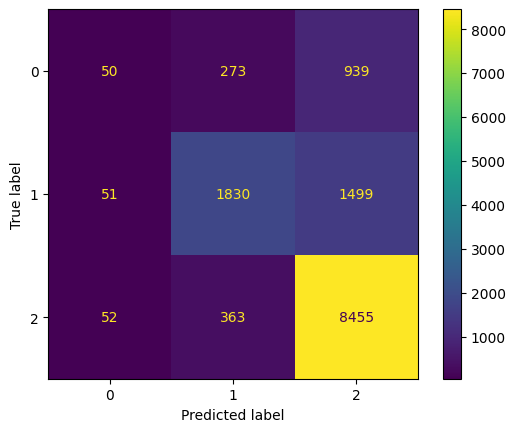

              precision    recall  f1-score   support

           0       0.33      0.04      0.07      1262
           1       0.74      0.54      0.63      3380
           2       0.78      0.95      0.86      8870

    accuracy                           0.76     13512
   macro avg       0.62      0.51      0.52     13512
weighted avg       0.73      0.76      0.72     13512



In [39]:
# Final evaluation on the test set using the best model
best_model = best_gbc
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
disp.plot()
plt.show()
print(classification_report(y_test, y_test_pred))
